<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/LinearAlgebra_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Eigen Decomposition**

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
v = np.array([1,3])
v

array([1, 3])

In [11]:
#plot vectors

def plot_vectors(vectors, colors):
  """
  plot onee or more vectors in 2d plane, specifying a color for each.

  Arguments
  ----------
  vectors: list of lists or arrays
          coordinates of vectors to plot. for ex [[1,2],[3,4]]
          contains two vectors to plot [1,2] [3,4]

  colors: list
         colors of vectors. for instance ['red','blue'] will display first vector in red and second in blue.

  example:
  plot_vectors([[1,2],[3,4]],['red','blue'])

  """

  plt.figure()
  plt.axvline(x=0,color='lightgrey')
  plt.axhline(y=0,color='lightgrey')

  for i in range(len(vectors)):
    x = np.concatenate([[0,0],vectors[i]])
    plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],
               angles='xy',scale_units='xy',scale=1,color=colors[i],)


(-1.0, 5.0)

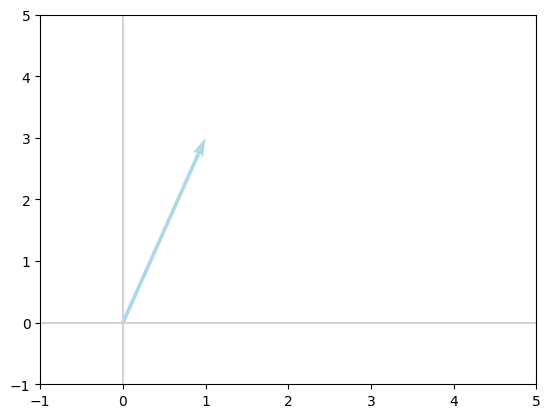

In [12]:
plot_vectors([v],['lightblue'])

plt.xlim(-1,5)
plt.ylim(-1,5)


(-2.0, 15.0)

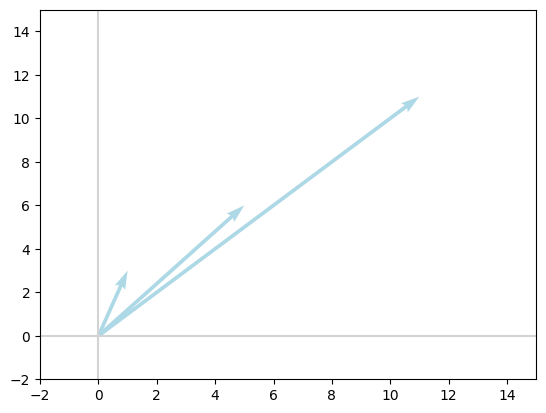

In [13]:
plot_vectors([v,[5,6],[11,11]],['lightblue','lightblue','lightblue'])
plt.xlim(-2,15)
plt.ylim(-2,15)

In [14]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [15]:
Iv = np.dot(I,v)
Iv

array([1, 3])

In [16]:
#matrix flipping over x-axis

E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [17]:
np.dot(E,v)

array([ 1, -3])

(-4.0, 4.0)

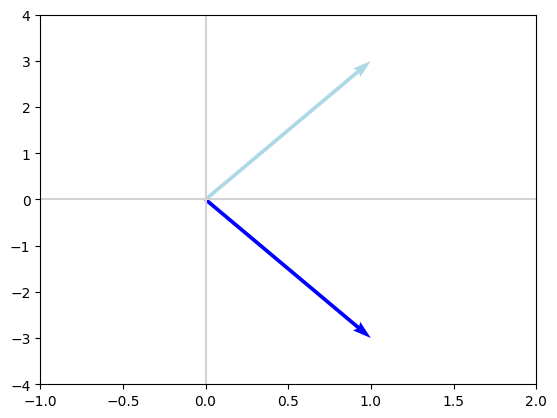

In [18]:
plot_vectors([v,np.dot(E,v)],['lightblue','blue'])
plt.xlim(-1,2)
plt.ylim(-4,4)

In [19]:
#flipping over y-axis
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [20]:
Fv = np.dot(F,v)
Fv

array([-1,  3])

(-4.0, 4.0)

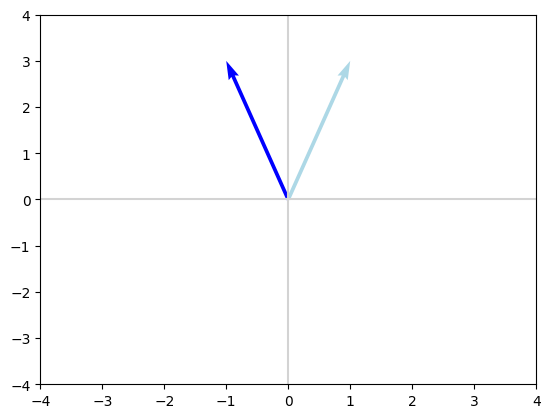

In [21]:
plot_vectors([Fv,v],['blue','lightblue'])
plt.xlim(-4,4)
plt.ylim(-4,4)

###Applying a flipping matrix to vectors is an example of AFFINE transformation.
###A change in geometry that may adjust distances or angles between vectprs, but preseves parrallelism in them.

###other common affine transormations include:
###* Scaling (changing tge length of vectors)
###* SHearing
###* Rotation

## A single matrix can apply multiple affine transformations simultaneously.
## flipping over an axis and rotate over 45 dgrees

In [22]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [23]:
Av = np.dot(A,v)
Av

array([11, -4])

(-8.0, 4.0)

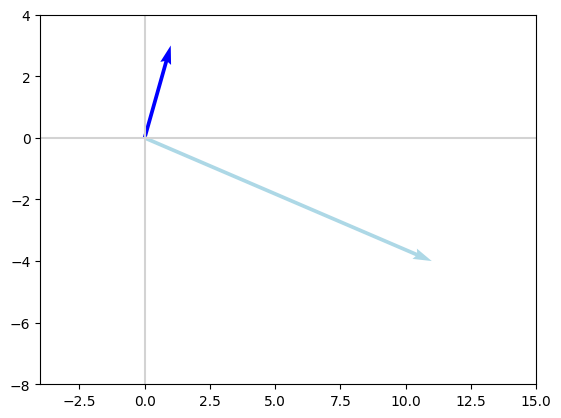

In [24]:
plot_vectors([v,Av],['blue','lightblue'])
plt.xlim(-4,15)
plt.ylim(-8,4)

##we can concatinate several vectors together into a matrix.

In [25]:
v = np.matrix([1,3])

In [26]:
v

matrix([[1, 3]])

In [27]:
v3 = np.array([-3,-1])
v4 = np.array([-1,1])

In [28]:
#concatenate to make a matrix

V = np.concatenate((np.matrix(v).T,
                    np.matrix([2,1]).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T),
                   axis=1)
V

matrix([[ 1,  2, -3, -1],
        [ 3,  1, -1,  1]])

In [29]:
IV = np.dot(I,V)

In [30]:
IV

matrix([[ 1,  2, -3, -1],
        [ 3,  1, -1,  1]])

In [31]:
I

array([[1, 0],
       [0, 1]])

In [32]:
AV = np.dot(A,V)
AV

matrix([[11,  2, -1,  5],
        [-4,  2, -4, -4]])

In [33]:
def vectorify(mtrx,col):
  return np.array(mtrx[:,col]).reshape(-1)

In [34]:
vectorify(V,0)

array([1, 3])

(-6.0, 6.0)

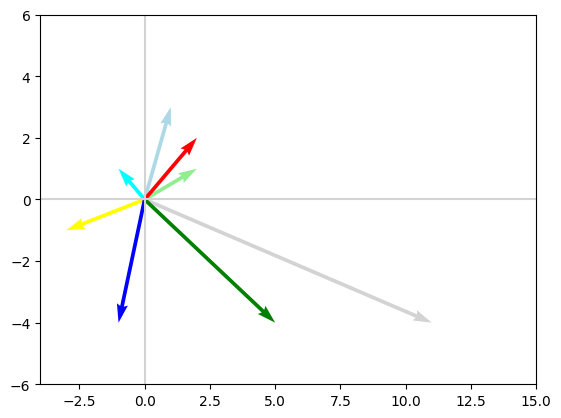

In [35]:
plot_vectors([vectorify(V,0),vectorify(V,1),vectorify(V,2),vectorify(V,3),
              vectorify(AV,0),vectorify(AV,1),vectorify(AV,2),vectorify(AV,3)],
             ['lightblue','lightgreen','yellow','cyan','lightgrey','red','blue','green'])

plt.xlim(-4,15)
plt.ylim(-6,6)

#**Eigen vectors and Eignvalues**

An eigenvector is a special vector v such that when it is transformed by some matrix, the prodcut Av, has the excact same direction.

An eigenvalue is a scalar that simply scales the eigenvector v such that the eq satisfies:
Av = lambda v



In [36]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

eig() returns:
* a vector of eigenvalues
* a matrix of eigenvectors

In [37]:
lambdas, V = np.linalg.eig(A)
lambdas,V

(array([ 1.37228132, -4.37228132]),
 array([[ 0.86011126, -0.76454754],
        [ 0.51010647,  0.64456735]]))

The matrix contains as many eigenvectors as there are columns in A

In [38]:
V #each column is a separate eigenvector

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With corresponding eigenvalue

In [39]:
lambdas

array([ 1.37228132, -4.37228132])

lets confirm Av=lambda.v

In [40]:
v = V[:,0]
v

array([0.86011126, 0.51010647])

In [41]:
Av = np.dot(A,v)
Av

array([1.18031462, 0.70000958])

In [42]:
np.dot(A,v) == np.dot(lambdas[0],v)

array([ True,  True])

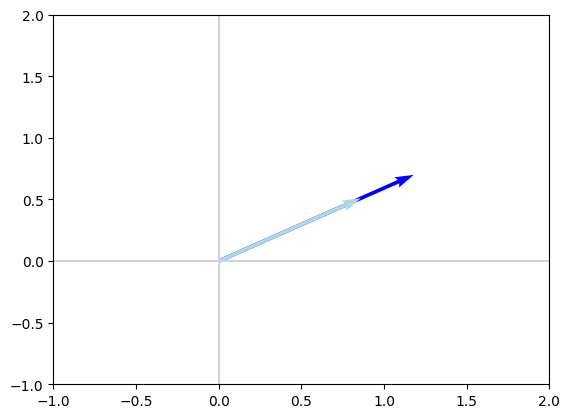

In [43]:
plot_vectors([Av,v],['blue','lightblue'])
plt.xlim(-1,2)
_=plt.ylim(-1,2)

In [44]:
v2  = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [45]:
Av2 = np.dot(A,v2)
Av2

array([ 3.34281692, -2.81822977])

(-4.0, 4.0)

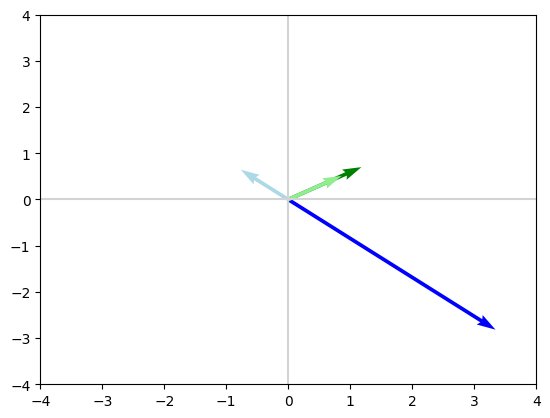

In [64]:
plot_vectors([Av2,v2,Av,v],['blue','lightblue','green','lightgreen'])
plt.xlim(-4,4)
plt.ylim(-4,4)

In [68]:
#pytorch implementation

A_pt= torch.tensor([[-1,4],[2,-2.]])
A_pt

tensor([[-1.,  4.],
        [ 2., -2.]])

In [84]:
L,V = torch.linalg.eig(A_pt)
Lr = L.real
Vr = V.real

In [86]:
v_p = Vr[:,0]
v_p

tensor([0.8601, 0.5101])

In [87]:
A_ptv = torch.matmul(A_pt,v_p)
A_ptv

tensor([1.1803, 0.7000])

(-1.0, 2.0)

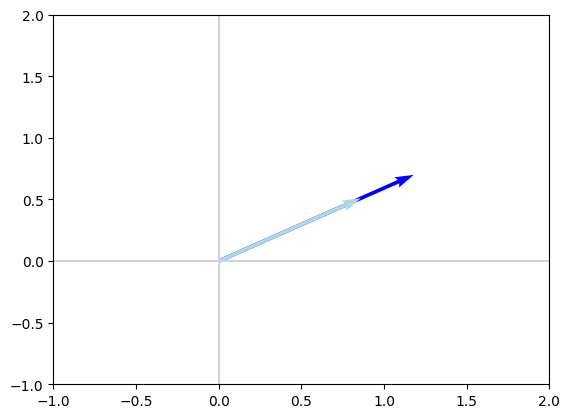

In [89]:
plot_vectors([A_ptv,v_p],['blue','lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [90]:
v_p2 = Vr[:,1]
v_p2

tensor([-0.7645,  0.6446])

In [91]:
A_vp2 = torch.matmul(A_pt,v_p2)
A_vp2

tensor([ 3.3428, -2.8182])

(-4.0, 3.0)

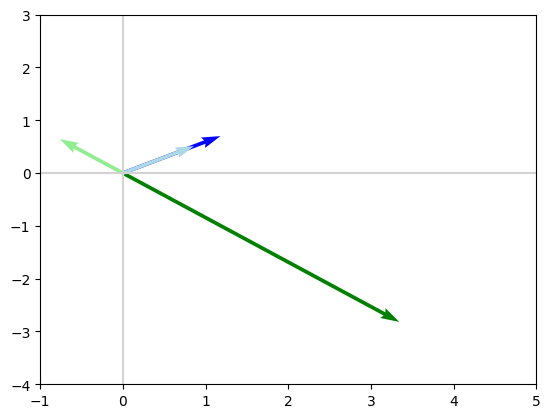

In [99]:
plot_vectors([A_vp2.numpy(),v_p2,A_ptv,v_p],['green','lightgreen','blue','lightblue'])
plt.xlim(-1,5)
plt.ylim(-4,3)

#**EigenVectors in >2D**